# Gun Violence Analysis - Revised Version

**Project Team 3**
 - Kyle Wright
 - Rachel Lee
 - Saira Gurung

## Introduction

Gun violence has been a hot topic of society throughout history. In recent times events of gun injuries or deaths have specifically been driven towards children and teenagers. News reports involving gun violence have increased dramatically in recent years, causing safety concerns for children and teens in the U.S.. Thus, making prevention paramount. Katie Gagnon wrote in a Philly Voice article that <i>every day, 78 kids or teens are killed or injured by gun violence. This is unacceptable but it can be changed (Gagnon, K., 2019)</i>. Accidental and intentional acts of violence make up a large split blaming gun owners for being careless.
  
From our background reading on the topic of gun violence in the U.S., we found that:

- Firearms are the second leading cause of death for children and teens (CDC, 2017).
- Compared to other high-income countries, American children aged 5 to 14 are 21 times more likely to be killed with guns, and American adolescents and young adults aged 15 to 24 are 23 times more likely to be killed with guns (Everytown for Gun Safety, 2019).
- When American children and teens are killed with guns, 58 percent are homicides, with 85% of those deaths occuring in the home, and nearly a third of those deaths are connected to intimate partner or family violence (Everytown for Gun Safety, 2019).
- There have been at least 405 incidents of gunfire on school grounds from 2013 to 2018. Of these, 260 occurred on the grounds of an elementary, middle, or high school, resulting in 109 deaths and 219 injuries (Everytown for Gun Safety, 2019).
- Hunting season takes place between July - Dec

Video

Script:
- Intro
- Claim
- Warrant
- Rebuttal
- Qualifer
- Whats Next (SMART)
- Legislation Piece

# Revised Version
## Claim

Gun owners are more careless in the second half of the year in respect to children and teens.

## Warrant

Trend of instances of gun violence by month.

![](Images/seaonality-of-gun-violence-incidents.png)

In the second half of the year their are a greater amount of gun violence events that occur. 

## Rebuttal

Intentional gun violence leads to more deaths than accidental events

![](Visualizations/Rebuttal_Viz.png)

Although accidental deaths are prevalent in children and teens, it does not compare to the amount of intentional acts of gun violence that occur on average per month. Gun violence should be a topic that is brought up year around and in amongst all circumstances, not just the second half of the year.

## Qualifier

Deaths and Injuries increase in the second half of the year which aligns with the increase of accidents.

![](Visualizations/7.png)

While intentional gun violence incidents cannot be controlled, accidental instances can be prevented by preaching gun safety and training amongst children and teens. Identifying the root cause of accidental deaths and injuries in the second half of the year may lead to increased preventative measures in the future. 


## What to do next?
Advice to gun owners on keeping their homes safe when children and teens are present:
- keep them locked and unloaded
- educate your children on gun safety
- be SMART

Being SMART is a program of the Everytown for Gun Safety Support Fund that is designed to be a conversation about guns, kids and safety. SMART stands for safety practices that all parents should understand and employ:
  
**S**ecure all guns in homes and vehicles.  
**M**odel responsible behavior.  
**A**sk about unsecured guns in other homes.  
**R**ecognize the role of guns in suicide.  
**T**ell your peers to Be SMART.  
  
This campaign offers a lot of resources for gun safety, including how to talk to your kids about guns. 

# Changes from First Version

Upon receiving feedback from our first versiion, the team discussed on how to improve the project analysis and made the followign changes:

1. Revised claim to be more general that encompases all 3 findings. 
2. Reduced scope to focus on incidents only involving children and teens.
2. Added an introduction and background reading findings on the topic of gun violence in the U.S..
3. Minor tweaks of the visualizations to provide better clarity on the findings and overall flow of narrative.
4. Added a video to summarize the project.

Additionally, the team also went back to revise the Data Exploratory and First Version files, providing better explanation and flow of the analysis.

<hr/>

# Making of Visualizations

Before creating the necessary charts, the following steps were taken to prepare the dataset and to set up color palette for consistency of colors throughout our charts:

1. Importing required python libraries for analysis.

In [1]:
import numpy as np
import pandas as pd
from functools import reduce
import altair as alt
alt.renderers.enable('notebook')
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

2. Import cleaned dataset prepared in our data exploratory phase.

In [2]:
df = pd.read_csv('Data/gun_violence.csv')

3. Convert `Incident Date` to a datetime object for use in Altair visualizations.

In [3]:
df['Incident Date'] = pd.to_datetime(df['Incident Date'], format="%B %d, %Y")

4. Drop `Unnamed` column, which does not provide any information of value to our analysis.

In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

5. Filtered out Adults from the dataset.

In [5]:
df1 = df[(df.Age == 'Child') | (df.Age == 'Teen')]

<hr style="height:0;border:1px solid #ececec" />

6. Setting up color palette by using the ColorBrewer website (http://colorbrewer2.org/#type=diverging&scheme=Spectral&n=4). We selected a color palette that is photocopy safe.

In [6]:
palette = alt.Scale(domain=['Accidental', 'Intentional'], \
                  range=['#2b83ba', '#fdae61'])

<hr style="height:0;border:1px solid #ececec" />

## To support our claim, we have developed the following visualizations illustrating warrant, rebuttal, and qualifier.

### Insight 1 (Warrant)
 
 Gun violence incidents tend to rise when the weather is warmer or during the holiday seasons.

#### Overall seasonality of gun violence in the United States between 2014 - 2016

In the First Version, we looked at the overall trend of gun violence incidents through the years of 2014 - 2016. We also looked at the seasonality by months for each of the incident categories. 
  
For our revised version, we wanted to just focused on the Intentional and Accidental incidents and see the overall seasonality by months so that we can identify if there are specific months where gun violence incidents takes place more frequently.

**What Changed**
1. Filtered out Police Involvement and Mass Shooting data.
2. Changed grouping to month instead of quarters.

In [7]:
df_seasonality = df.copy()
df_seasonality.rename(columns={'Incident Date': 'Date'}, inplace=True)

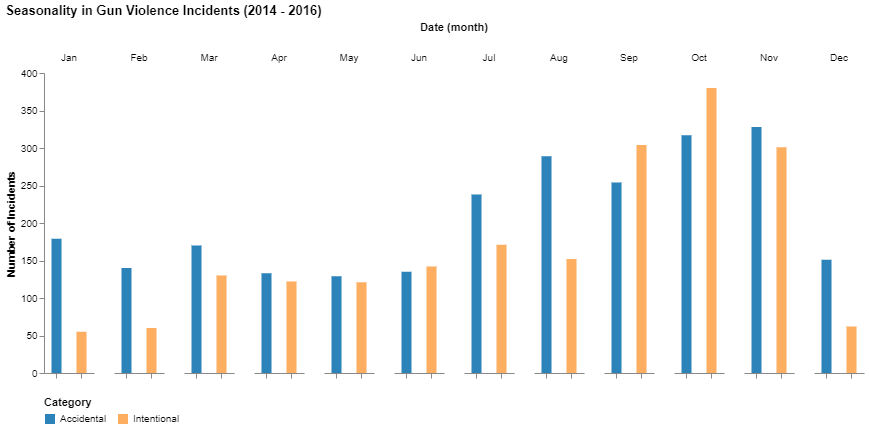

In [8]:
chart = alt.Chart(df_seasonality[(df_seasonality['Category'] == 'Accidental' )| (df_seasonality['Category'] == 'Intentional') ], title='Seasonality in Gun Violence Incidents (2014 - 2016)', name='seasonality') \
        .mark_bar(size=10) \
        .encode(
    column = alt.Column('Date', timeUnit='month'),
    x = alt.X('Category', axis=alt.Axis(labels=False, title=None)),
    y = alt.Y('count(Date)', axis=alt.Axis(title='Number of Incidents')),
    color = alt.Color('Category', scale=palette),
    tooltip = ['Category']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 50
).configure_legend(
     orient = "bottom"
)

#### Observation

Looking at the chart, we can see that the second half of the year has higher incident counts compared to the first half of the year, peaking in October, followed by Novemnber and September. This could be due to hunting season, where guns become more accessible to children and teens.

<hr/>

### Insight 2 (Rebuttal)

Intentional gun violence leads to more deaths than accidental events

- Grouped 'Incident Date' and 'Category' to get the average of # Killed by date, age, and category

In [9]:
df2 = df1.groupby(['Category', 'Incident Date', 'Age']).mean().reset_index()

In [10]:
source = df2

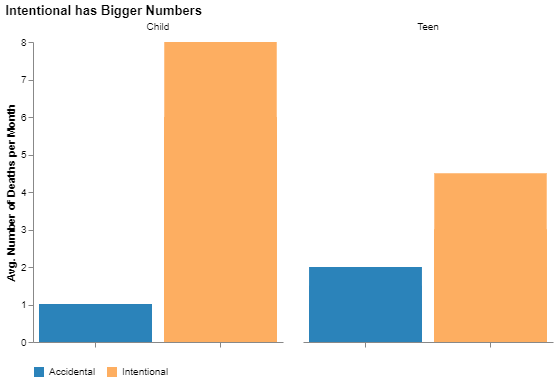

In [11]:
chart = alt.Chart(source, title = 'Intentional has Bigger Numbers').mark_bar().encode(
    x = alt.X('Category', axis=alt.Axis(labels=False, title=None)),
    y = alt.Y('# Killed', title = 'Avg. Number of Deaths per Month'),
    color = alt.Color('Category', scale= palette, title = None),
    column = alt.Column('Age', title = None),
    tooltip = ['Category','Incident Date','# Killed','# Injured']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 250
).configure_legend(
     orient = "bottom"
)

**What Changed**
1. Removed the difficult to interpret dot plot
2. Focused on the rebuttal argument 
3. Got straight to the point to make the rebuttal clearly stand out

**What was done to the data**
1. Filtered out Adults, Police Involvement, and Mass Shootings allowing for the drawbacks of our data to get filtered out.
2. Took the average per month to simplify the connection between the big picture rather than focusing on monthly changes.
3. Created a visualization that drives the rebuttal argument straight to the audience, signifying this is an issue and society needs to be educated on how to prevent these occurences regardless of what month it is.

**Observation**

This is disputing the claim by mentioning that gun violence is not subject to a certain time of the year and that although accidents are a terrible mishap, intentional gun violence is a far worst problem we face.

## Insihgt 3 (Qualifier)


Using Tableau, the data from the data exploration phase was imported. To create the chart, under the column section, the incidient date was categorized into months. A calculated field was created to add the instance of both numbers of death and number of injuries. The rows section contains the sum of this calculated field, which was then set as a moving average to create a smooother curve. The line chart was then filtered by category set as accidental, and age set to only child and teen. 

![](Visualizations/7.png)

**Observation**



# Conclusion
While some may argue that a change in legislature to tighten gun laws is the way to go, its impact is not profound as people with an intention to procure a gun, especially with an intention to do harm, do not go through the system to purchase guns legally. They find other means to obtain their guns, often illegally. Therefore, more effort needs to be put in place, such as programs like Be SMART, to creating gun violence prevention and safety amongst gun owners in hopes to reduce gun violence incidents involving children and teens, especially in unintentional incidents that could have been prevented with precaution measures.

# References

Dataset Source:  
**Kaggle** - https://www.kaggle.com/gunviolencearchive/gun-violence-database#officer_involved_shootings.csv  
**Gun Violence Archive** - https://www.gunviolencearchive.org/reports

Color Palette:  
**ColorBrewer 2.0** - http://colorbrewer2.org

Asher, J. (2018, Sept 21). <i>A Rise in Murder? Let’s Talk About the Weather. New York Times</i>. Retrieved from https://www.nytimes.com/2018/09/21/upshot/a-rise-in-murder-lets-talk-about-the-weather.html. Accessed on May 29, 2019.

Everytown for Gun Safety (2019, May 29). <i>The Impact of Gun Violence on Children and Teens</i>. Retrieved from https://everytownresearch.org/impact-gun-violence-american-children-teens/#foot_note_5. Accessed on June 1, 2019.

Gagnon, K. (2019, June 7). <i>Gun violence is a huge problem for U.S. children, so prevention is paramount</i>. Retrieved from https://www.phillyvoice.com/gun-safety-violence-children-america-prevention-paramount/. Accessed on June 7, 2019.  

Gifford Law Center (n.d.). <i>Shootings Spike in Summer Months</i>. Retrieved from https://lawcenter.giffords.org/resources/publications/shootings-spike-in-summer-months/. Accessed on May 29, 2019.

Tableau Link: https://public.tableau.com/profile/saira.gurung#!/vizhome/GunViolenceinUSA/Overalltrendandrelationshipofshootinginstancesandnumberofpeopleinjuredorkilledfrom2014to2016


[EOF]